# Scatterplot and Kmeans

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# import dataset 
df = pd.read_csv("../../data/happyscore_income.csv")

df[['country', 'GDP', 'happyScore', 'region', 'avg_income']].head()

,country,GDP,happyScore,region,avg_income
0,Armenia,0.76821,4.350,'Central and Eastern Europe',2096.76
1,Angola,0.75778,4.033,'Sub-Saharan Africa',1448.88
2,Argentina,1.05351,6.574,'Latin America and Caribbean',7101.12
3,Austria,1.33723,7.200,'Western Europe',19457.04
4,Australia,1.33358,7.284,'Australia and New Zealand',19917.00


In [7]:
# set the x and y variables
col_x = 'happyScore'
col_y = 'GDP'

In [8]:
# calculate the standart deviation and the mean
x_mean = df[col_x].mean()
x_stdev = df[col_x].std()

y_mean = df[col_y].mean()
y_stdev = df[col_y].std()

print(x_mean, x_stdev)
print(y_mean, y_stdev)

5.421909909909912 1.180800549315818
0.8419090990990992 0.3875905043131557


In [13]:
# calculate the normalised values on x and y
x_min = min(df[col_x])
x_max = max(df[col_x])

norm_x = ((df[col_x] - x_min)/(x_max - x_min))
df['norm_x'] = norm_x

y_min = min(df[col_y])
y_max = max(df[col_y])

norm_y = ((df[col_y] - y_min)/(y_max - y_min))
df['norm_y'] = norm_y
norm_y

0      0.486184
1      0.479449
2      0.670414
3      0.853624
4      0.851267
         ...   
106    0.675677
107    0.398331
108    0.584518
109    0.293864
110    0.165116
Name: GDP, Length: 111, dtype: float64

In [10]:
# create Kmeans clusters
from sklearn.cluster import KMeans

x_y = np.column_stack((df['norm_x'], df['norm_y']))

km_res = KMeans(n_clusters=2).fit(x_y)
clusters = km_res.cluster_centers_
clusters

array([[0.74214874, 0.73933614],
       [0.35627928, 0.33903262]])

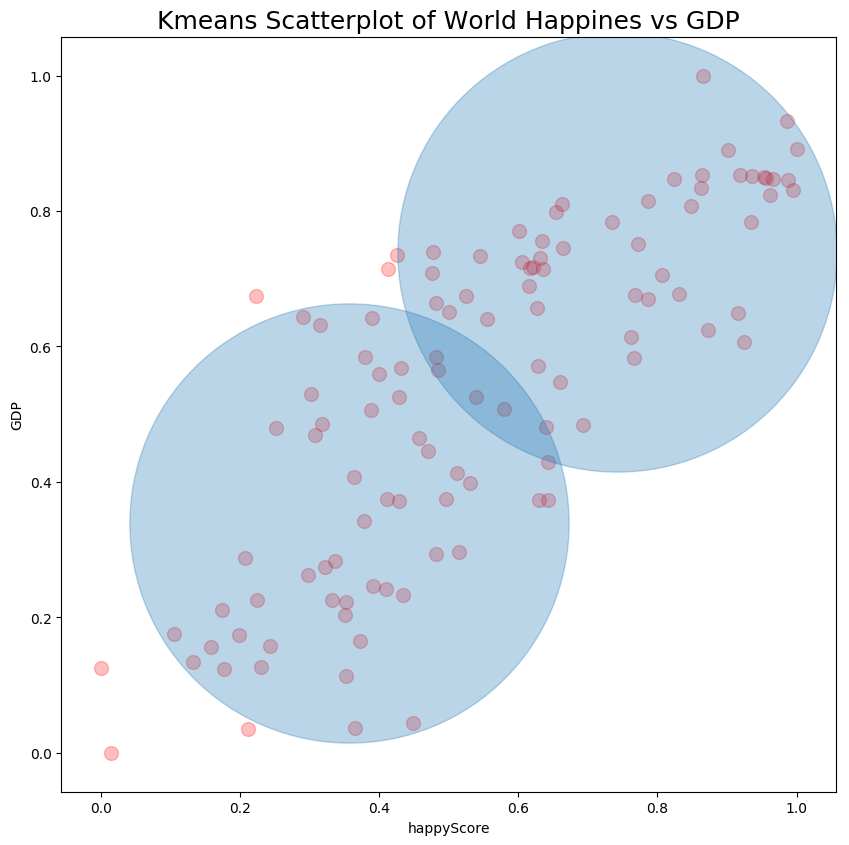

In [51]:
figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')

plt.xlabel(col_x)
plt.ylabel(col_y)

plt.scatter(df.norm_x, df.norm_y, alpha = 0.25, s = 100, color='red')
plt.title("Kmeans Scatterplot of World Happines vs GDP", fontsize=18)
plt.scatter(clusters[:,0], clusters[:,1], s = 100000, alpha=0.30)

In [44]:
df['cluster'] = km_res.labels_
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]

In [37]:
df1 = df[(df['norm_x'] > clusters[0][0]) & (df['norm_y'] > clusters[1][0])]
df2 = df[(df['norm_x'] < clusters[0][0]) & (df['norm_y'] < clusters[1][0])]

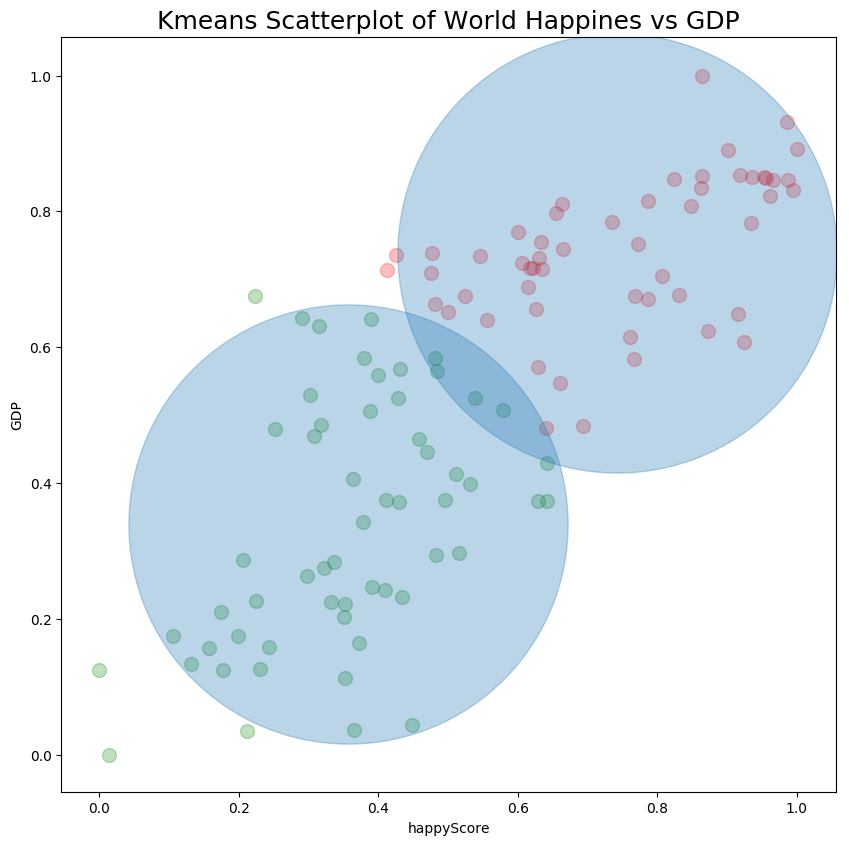

In [50]:
figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')

plt.xlabel(col_x)
plt.ylabel(col_y)

plt.scatter(df1.norm_x, df1.norm_y, alpha = 0.25, s = 100, color='red')
plt.scatter(df2.norm_x, df2.norm_y, alpha = 0.25, s = 100, color='green')
plt.title("Kmeans Scatterplot of World Happines vs GDP", fontsize=18)
plt.scatter(clusters[:,0], clusters[:,1], s = 100000, alpha=0.30)

'Central and Eastern Europe'
'Central and Eastern Europe'
red


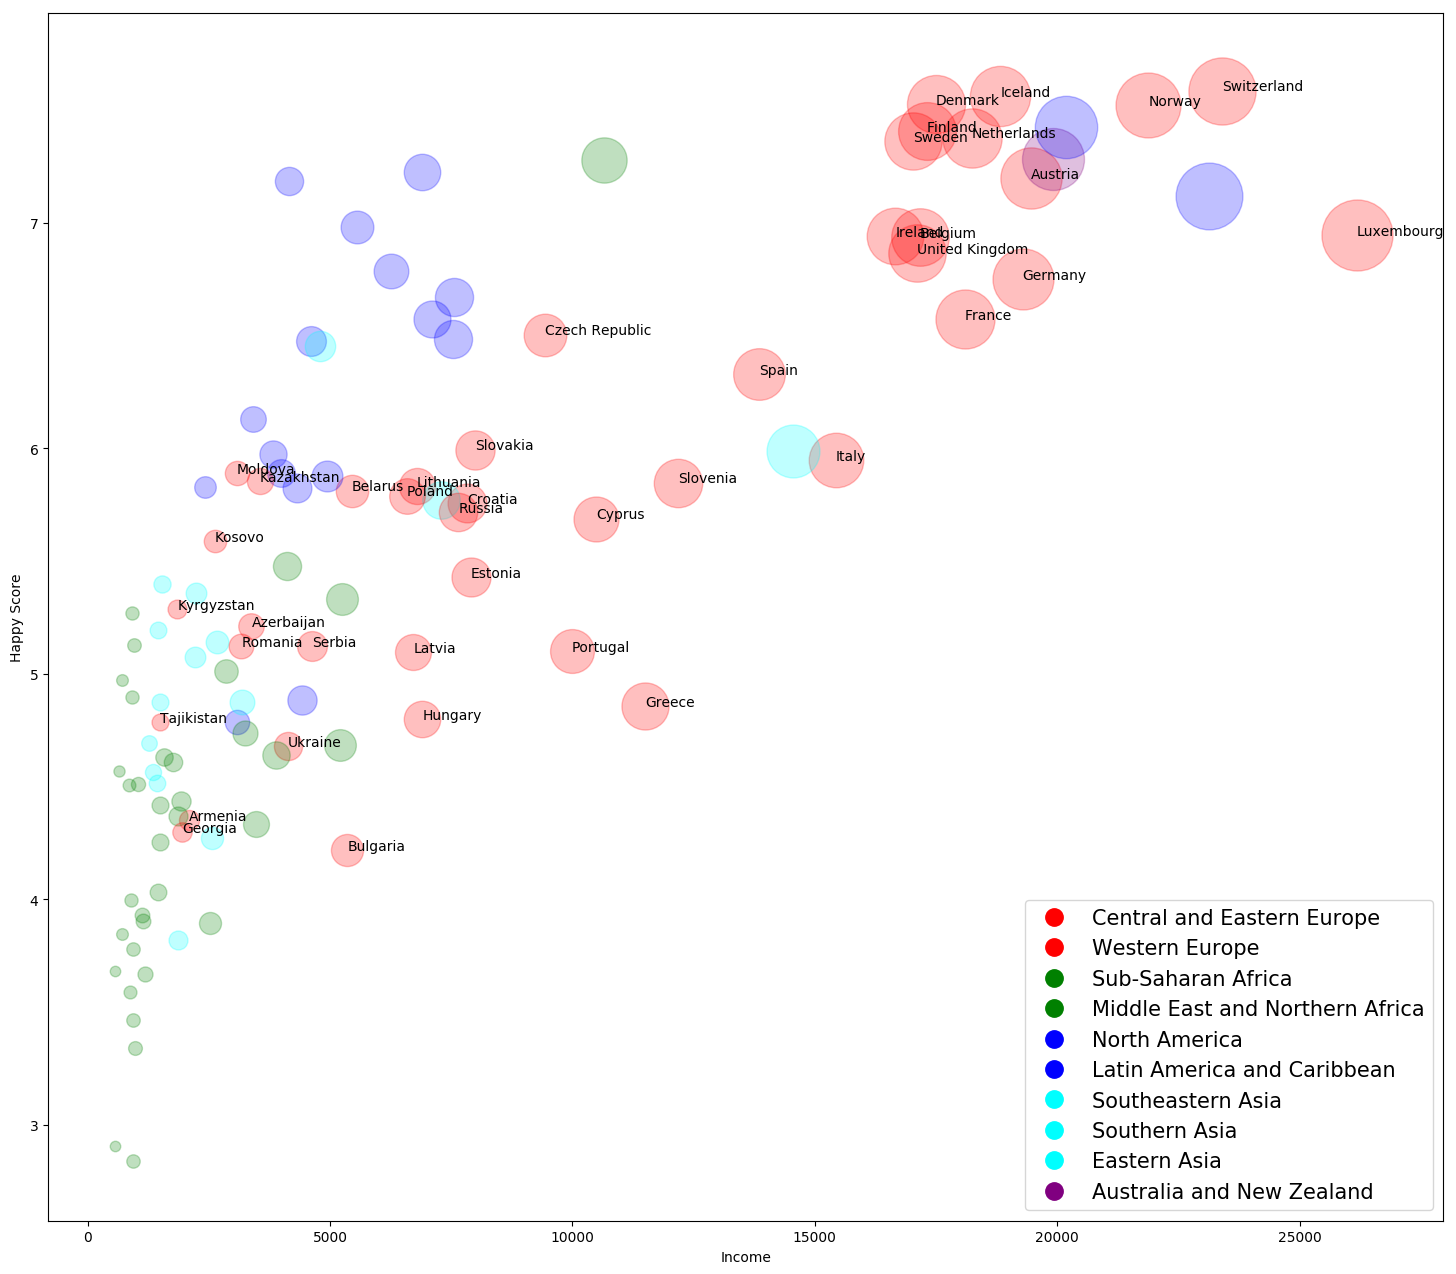

In [57]:
[plt.text(x=row['avg_income'], y=row['happyScore'], s=row['country']) for k,row in df.iterrows() if 'Europe' in row.region]

[Text(2096.76, 4.35, 'Armenia'),
 Text(19457.04, 7.2, 'Austria'),
 Text(3381.600000000001, 5.2120000000000015, 'Azerbaijan'),
 Text(17168.505, 6.937, 'Belgium'),
 Text(5354.82, 4.218, 'Bulgaria'),
 Text(5453.933333333333, 5.813, 'Belarus'),
 Text(23400.04, 7.5870000000000015, 'Switzerland'),
 Text(10493.955, 5.689, 'Cyprus'),
 Text(9430.905, 6.505, 'Czech Republic'),
 Text(19285.96, 6.75, 'Germany'),
 Text(17496.510000000002, 7.527, 'Denmark'),
 Text(7906.725, 5.4289999999999985, 'Estonia'),
 Text(13842.990000000002, 6.329, 'Spain'),
 Text(17310.195, 7.4060000000000015, 'Finland'),
 Text(18096.788571428573, 6.575, 'France'),
 Text(17099.550000000007, 6.867000000000001, 'United Kingdom'),
 Text(1957.2666666666669, 4.297, 'Georgia'),
 Text(11507.565, 4.857, 'Greece'),
 Text(7828.08, 5.759, 'Croatia'),
 Text(6903.8836363636365, 4.8, 'Hungary'),
 Text(16657.77, 6.94, 'Ireland'),
 Text(18828.345, 7.561, 'Iceland'),
 Text(15437.595, 5.948, 'Italy'),
 Text(1852.64, 5.2860000000000005, 'Kyrgyz

ValueError: Image size of 8765925x1689 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>